In [20]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns


import nltk
import unicodedata
import scipy.stats as stats

## Orginal Df

In [88]:
df = pd.read_csv('master_train_data.csv', index_col=0).reset_index().drop(columns=['index', 'id', 'prompt_id'])

In [89]:
df 

,text,generated
0,Having students of different ages in the same ...,1
1,After researching examples of successful group...,1
2,"For many students and teachers, a four-day sch...",1
3,"Delve into what motivates you to take action, ...",1
4,"Dear Senator, If one could sum up the definiti...",0
...,...,...
3794,Honesty is a fundamental part of any healthy r...,1
3795,"Dear Senator, As you may know, there is a huge...",0
3796,The electoral collage should be disbanded. Not...,0
3797,First impressions often form the basis for how...,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3799 non-null   object
 1   generated  3799 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.5+ KB


In [91]:
df.generated.value_counts()

1    2424
0    1375
Name: generated, dtype: int64

## Train, val, Test


In [ ]:
def train_val_test(df, stratify=False, target=None):
    train_validate, test = train_test_split(df,
                                            random_state=706,
                                            train_size=0.8,
                                            stratify=df[target] if stratify else None)
    train, val = train_test_split(train_validate,
                                  random_state=706,
                                  train_size=0.7,
                                  stratify=train_validate[target] if stratify else None)
    return train, val, test

In [93]:
train, val, test = train_val_test(df, stratify=True, target='generated')

In [94]:
train.shape, val.shape, test.shape

((2127, 2), (912, 2), (760, 2))

In [95]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    # stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words]

In [136]:
ai_words =  ' '.join(train[train['generated'] == 1]['text'].str.split().explode())
student_words = ' '.join(train[train['generated'] == 0]['text'].str.split().explode())
all_words = ' '.join(train['text'].str.split().explode())

In [137]:

ai_words = ai_words.split(' ')
student_words = student_words.split(' ')
all_words = all_words.split(' ')

In [138]:
ai_freq = pd.Series(ai_words).value_counts()
student_freq = pd.Series(student_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [139]:
word_counts = pd.concat([ai_freq, student_freq, all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['ai','student', 'all']
word_counts.head()

,ai,student,all
to,12030,13044,25074
and,11067,9340,20407
the,9624,24398,34022
a,6977,10140,17117
of,6947,12289,19236


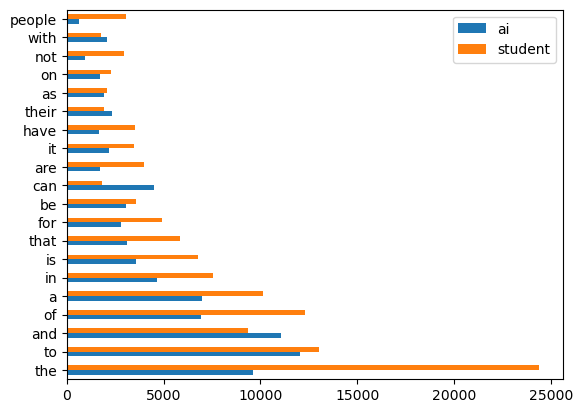

In [140]:
word_counts.sort_values('all', ascending=False
                       )[['ai','student']].head(20).plot.barh()
plt.show()

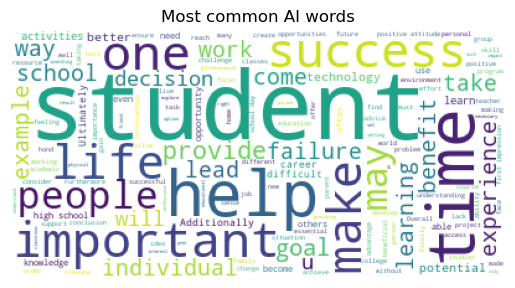

In [146]:
img = WordCloud(background_color='White',
         ).generate(' '.join(ai_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common AI words')
plt.show()

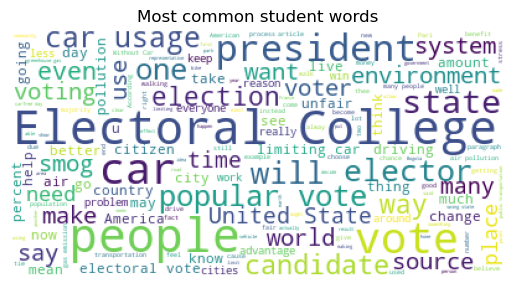

In [143]:
img = WordCloud(background_color='White',
         ).generate(' '.join(student_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common student words')
plt.show()

## Stemmed df thanks Fermin :) 

In [24]:
df2 = pd.read_csv('data_stemmed.csv', index_col=0).reset_index().drop(columns='index')

In [25]:
df2

,text,generated
0,"['have', 'student', 'of', 'differ', 'age', 'in...",1
1,"['after', 'research', 'exampl', 'of', 'success...",1
2,"['for', 'mani', 'student', 'and', 'teacher', '...",1
3,"['delv', 'into', 'what', 'motiv', 'you', 'to',...",1
4,"['dear', 'senat', 'if', 'one', 'could', 'sum',...",0
...,...,...
3794,"['honesti', 'is', 'a', 'fundament', 'part', 'o...",1
3795,"['dear', 'senat', 'as', 'you', 'may', 'know', ...",0
3796,"['the', 'elector', 'collag', 'should', 'be', '...",0
3797,"['first', 'impress', 'often', 'form', 'the', '...",1


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3799 non-null   object
 1   generated  3799 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.5+ KB


In [27]:
df2.generated.value_counts(normalize=True)

1    0.638063
0    0.361937
Name: generated, dtype: float64

In [28]:
train, val, test = train_val_test(df2, stratify=True,target='generated')

In [32]:
train.shape, val.shape, test.shape

((2127, 2), (912, 2), (760, 2))

In [33]:
train.head()

,text,generated
657,"['it', ""'"", 's', 'the', 'tuesday', 'after', 't...",0
3127,"['ralph', 'waldo', 'emerson', 'wa', 'a', '19th...",1
2193,"['car', 'are', 'start', 'to', 'becom', 'more',...",0
3467,"['imagin', 'that', 'the', 'presid', 'the', 'ma...",0
2463,"['make', 'good', 'decis', 'can', 'be', 'diffic...",1


In [41]:
ai_words =' '.join(train[train.generated==1]['text'])
student_words = ' '.join(train[train.generated==0]['text'])
all_words = ' '.join(train['text'])

In [77]:
ai_word_list = ai_words.split(",")
# student_word_list = student_words.split(" ")
# all_word_list = all_words.split(" ")

In [69]:
ai_freq = pd.Series(ai_word_list).value_counts()
student_freq = pd.Series(student_word_list).value_counts()
all_freq = pd.Series(all_word_list).value_counts()

In [71]:
word_counts = pd.concat([ai_freq, student_freq, all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['ai','student', 'all']
word_counts.head()

,ai,student,all
"'to',",12180,13361,25541
"'and',",11097,9503,20600
"'the',",9968,27125,37093
"'a',",7101,10631,17732
"'of',",6960,12354,19314


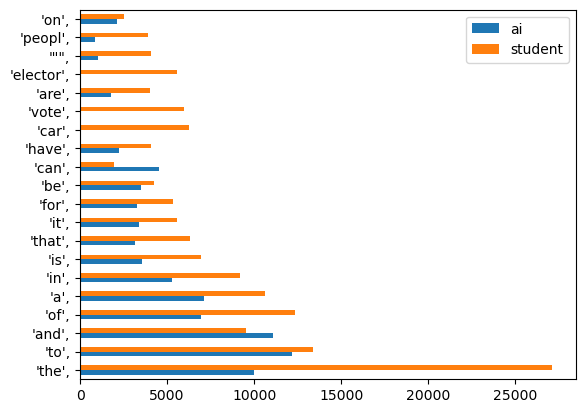

In [72]:
word_counts.sort_values('all', ascending=False
                       )[['ai','student']].head(20).plot.barh()
plt.show()

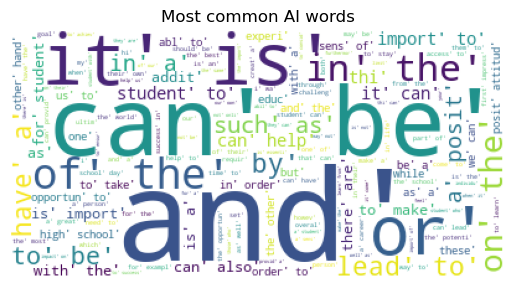

In [73]:
img = WordCloud(background_color='White',
         ).generate(' '.join(ai_word_list))
plt.imshow(img)
plt.axis('off')
plt.title('Most common AI words')
plt.show()

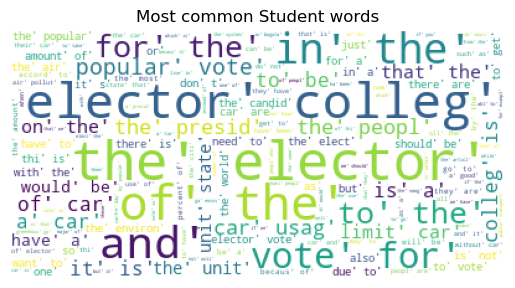

In [60]:
img = WordCloud(background_color='White',
         ).generate(' '.join(student_word_list))
plt.imshow(img)
plt.axis('off')
plt.title('Most common Student words')
plt.show()

## Let's look for the amount of contrations and compare. 

In [75]:
ai_word_list

["['ralph',",
 "'waldo',",
 "'emerson',",
 "'wa',",
 "'a',",
 "'19th',",
 "'centuri',",
 "'essayist',",
 "'poet',",
 "'and',",
 "'philosoph',",
 "'renown',",
 "'for',",
 "'hi',",
 "'write',",
 "'on',",
 "'the',",
 "'import',",
 "'of',",
 "'person',",
 "'growth',",
 "'and',",
 "'selfreli',",
 "'hi',",
 "'quot',",
 "'unless',",
 "'you',",
 "'tri',",
 "'to',",
 "'do',",
 "'someth',",
 "'beyond',",
 "'what',",
 "'you',",
 "'have',",
 "'alreadi',",
 "'master',",
 "'you',",
 "'will',",
 "'never',",
 "'grow',",
 "'embodi',",
 "'hi',",
 "'belief',",
 "'that',",
 "'challeng',",
 "'yourself',",
 "'and',",
 "'risk',",
 "'failur',",
 "'are',",
 "'essenti',",
 "'for',",
 "'real',",
 "'growthpass',",
 "'is',",
 "'an',",
 "'integr',",
 "'part',",
 "'of',",
 "'an',",
 "'individu',",
 "'chase',",
 "'success',",
 "'and',",
 "'growth',",
 "'it',",
 "'give',",
 "'a',",
 "'person',",
 "'enthusiasm',",
 "'and',",
 "'energi',",
 "'to',",
 "'keep',",
 "'tri',",
 "'even',",
 "'in',",
 "'the',",
 "'face',",
 "'